[[  0.   0.   0.  48.  46.   0.   0.   0.]
 [  0.  44.  42.  40.  38.  36.  34.   0.]
 [ 19.  32.  30.  28.  26.  23.  25.   0.]
 [ 27.  29.  31.  33.  35.  37.  39.  41.]
 [ 43.  45.  47.  24.  22.  20.  18.  16.]
 [  0.  14.  12.   8.   6.   5.  10.  21.]
 [  0.   1.   2.   9.  17.   7.  11.   0.]
 [  0.   0.   0.  13.  15.   0.   0.   0.]]


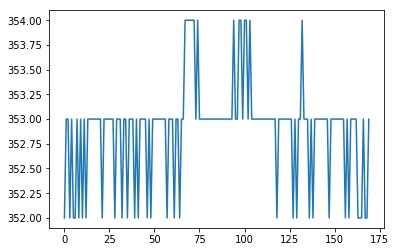

In [1]:
%run 'openfiles.ipynb'

# get mapping for image pixels
pixel_map = np.loadtxt(map_path)
algorithm='deflation'

In [2]:
def calc_ICA(matriz_method,number_componentes):
    # Compute ICA:
    """
        Private method creating a vector image in a chosen folder
        Only for Fast ICA
        #note that you need the variable " ordem " to desvector_patches
        Args:
        ----
        matriz_method (str): Method that will return a transformation
        of an matrix in array
        number_componentes(int): Number of components that will be used

        Returns:
        pesq(array 2D)
        -------
        
    """  
    rn = np.random.RandomState(0)
    ica = FastICA(n_components=number_componentes,algorithm=algorithm, fun='logcosh',random_state=rn)
    
    
    if (matriz_method=='Serpentine'):
        #Use desvetor_serpentina 
            S_ = ica.fit_transform(matriz_serpentina) 
            A_ = ica.components_             

    

    #Convert the input to an array.
    myarray = np.asarray(S_)
    pesq2 = np.asarray(A_)
    
    pesq= (pesq2-pesq2.min())/(pesq2.max()-pesq2.min())

    return pesq 


In [3]:
def notacao_cientica(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

In [4]:
def path_serpentina(number):
    #number=Number of components that were used in the function "calc_ICA"
    N=str(number)
    serpentina_path = home_path+'/BC1/analysis/'+data_region+'/FastICA/'+N+'_Sources/serpentine_method'
    


    return serpentina_path



In [5]:
#Sets image size
def create_image_ICA(method,pesq):
    """
        Private method creating a vector image in a chosen folder
        Only for Fast ICA
        #note that you need the variable " ordem " to desvector_patches
        Args:
        ----
        method(string):Method that will be used to transform the matrix in 8 X 8
   
        pesq(array): Matrix returned by function "calc_ICA"
       
        Returns:
        Image
        -------
        
    """  
    number=pesq.shape[0]
    #Method to generate the images
    for lista in range(number):
        
        
        #Sets image size
        plt.figure(figsize=(15,15))
        plt.subplots(1,1)
    
        #Create the image
        if (method=='Serpentine'):
            #Use desvetor_serpentina in matshow
            plt.matshow(desvector_serpentina(pesq[lista]),cmap='YlGnBu', fignum=1,vmin=0, vmax=1)
            path=path_serpentina(number)
           
            
            
        X= str(lista+1)
        N=str(number)
        sm = plt.cm.ScalarMappable(cmap='YlGnBu',norm=plt.Normalize(vmin=0, vmax=1))
        sm._A = []
        cb=plt.colorbar(sm,format=ticker.FuncFormatter(notacao_cientica))
        cb.ax.tick_params(labelsize=15)
        tick_locator = ticker.MaxNLocator(nbins=5)
        cb.locator = tick_locator
        cb.update_ticks()
        
        #Sets image margins size
        
        #plt.xlabel('Smarts')
        #plt.ylabel('Probability')
        plt.title('Source '+X +' of '+str(number)+': FastICA Method '+str(method) , fontsize = 25)
        #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
        
        plt.xticks([])
        plt.yticks([])
        #plt.axis('off')
        # hide tick and tick label of the big axes
        plt.xlabel("Pixels X",fontsize=20)
        plt.ylabel("Pixels Y",fontsize=20)

        #place to create the image
        

 
        plt.savefig(path+'/Sources/sources_'+N+'_image_'+X+'.png', bbox_inches='tight')
       
        plt.clf()
        
     

In [6]:
#Method Serpentine

In [7]:
#For 03 Sources
sources03=calc_ICA('Serpentine',3)
#create_image_ICA("Serpentine",sources03) 
#plt.close('all')
print "Sources 03"
#kmeans_sources03 = KMeans(n_clusters=2, random_state=0).fit(sources03)
#print kmeans_sources03.labels_

Sources 03


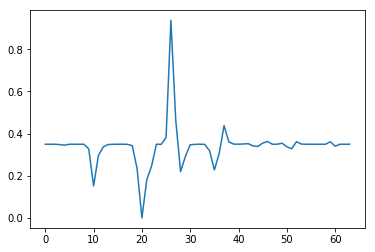

In [17]:
plt.plot(sources03[2])
plt.show()

In [19]:
#For 04 Sources
sources04=calc_ICA('Serpentine',4)
#create_image_ICA("Serpentine",sources04)
#plt.close('all')
print "Sources 04"
#kmeans_sources04 = KMeans(n_clusters=2, random_state=0).fit(sources04)
#print kmeans_sources04.labels_

Sources 04


In [20]:
#For 05 Souces
sources05=calc_ICA("Serpentine",5)
#create_image_ICA("Serpentine",sources05) 
#plt.close('all')
print "Sources 05"
#kmeans_sources05 = KMeans(n_clusters=3, random_state=0).fit(sources05)
#print kmeans_sources05.labels_

Sources 05


In [21]:
#For 06 Sources
sources06=calc_ICA("Serpentine",6)
#create_image_ICA("Serpentine",sources06)
#plt.close('all')
print "Sources 06"
#kmeans_sources06 = KMeans(n_clusters=3, random_state=0).fit(sources06)
#print kmeans_sources06.labels_

Sources 06


In [22]:
#For 07 Sources
sources07=calc_ICA("Serpentine",7)
#create_image_ICA("Serpentine",sources07)
#plt.close('all')
print "Sources 07"
#kmeans_sources07 = KMeans(n_clusters=3, random_state=0).fit(sources07)
#print kmeans_sources07.labels_

Sources 07


In [23]:
#For 08 Sources
sources08=calc_ICA("Serpentine",8)
#create_image_ICA("Serpentine",sources08)
#plt.close('all')
print "Sources 08"
#kmeans_sources08 = KMeans(n_clusters=3, random_state=0).fit(sources08)
#print kmeans_sources08.labels_

Sources 08


In [24]:
#For 09 Sources
sources09=calc_ICA("Serpentine",9)
#create_image_ICA("Serpentine",sources09) 
#plt.close('all')
print "Sources 09"
#kmeans_sources09 = KMeans(n_clusters=3, random_state=0).fit(sources09)
#print kmeans_sources09.labels_

Sources 09


In [25]:
#For 48 Sources
sources48=calc_ICA("Serpentine",48)
#create_image_ICA("Serpentine",sources48)
#plt.close('all')
print "Sources 48"

/home/Creison/miniconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Sources 48


In [27]:
#For 64 Sources
sources64=calc_ICA("Serpentine",64)
#create_image_ICA("Serpentine",sources64) 
#plt.close('all')
print "Sources 64"

Sources 64
